In [3]:
import torch

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import os
import nibabel
import glob
import shutil

%matplotlib inline

import cv2

In [4]:
predictions = torch.load("/cs/casmip/netana03/work/trials/HRNet-Facial-Landmark-Detection/output/FETAL/fetal_landmark_hrnet_w18/predictions.pth")
OUTPUT_PNG_DIR = "/cs/casmip/netana03/work/trials/HRNet-Facial-Landmark-Detection/data/fetal/images"


In [5]:
df_for_hrnet = pd.read_csv("/cs/casmip/netana03/work/trials/HRNet-Facial-Landmark-Detection/data/fetal/test.csv")

In [6]:
img = cv2.imread(os.path.join(OUTPUT_PNG_DIR, df_for_hrnet.loc[0, "image_name"]))

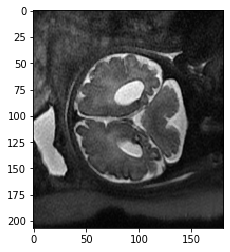

In [7]:
plt.imshow(img)

/cs/labs/josko/netana03/work/env/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


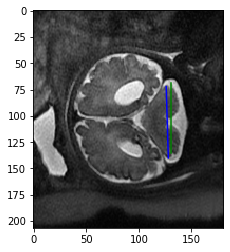

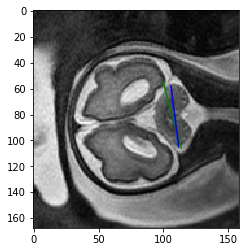

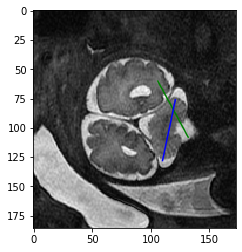

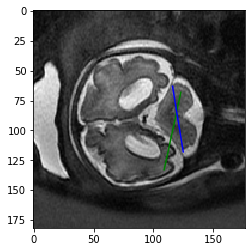

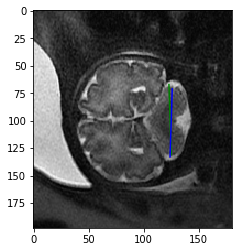

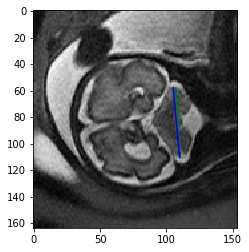

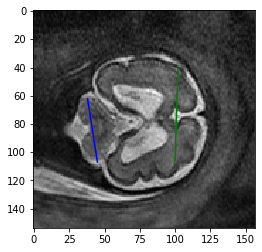

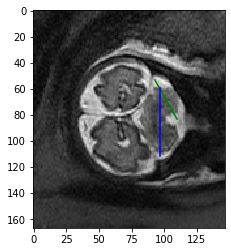

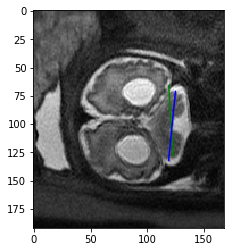

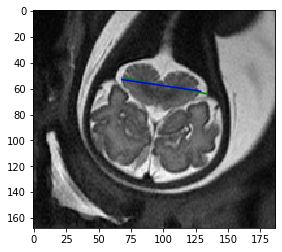

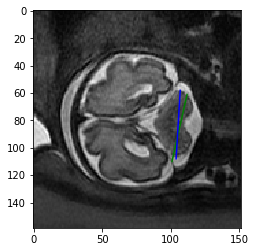

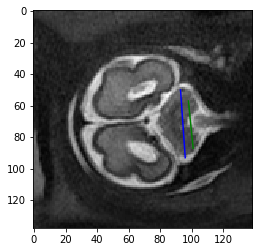

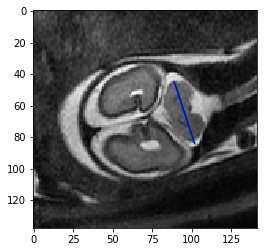

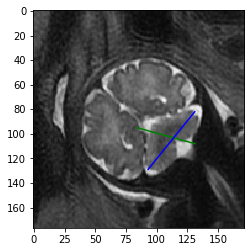

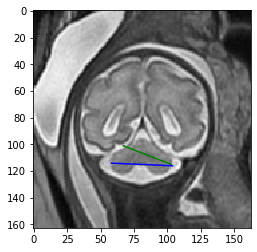

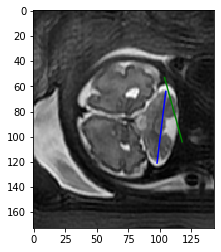

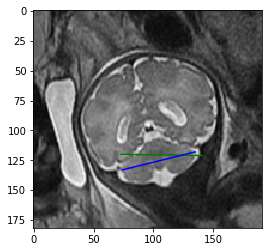

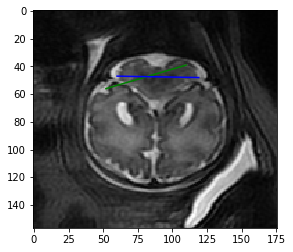

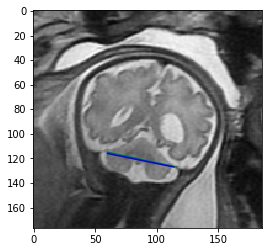

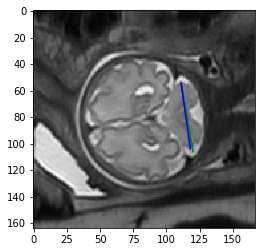

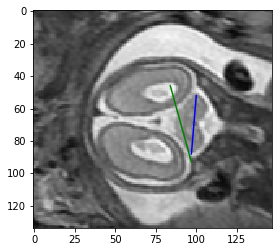

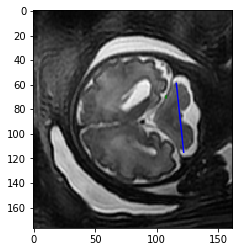

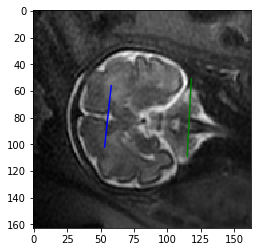

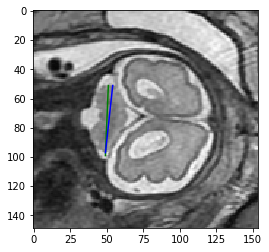

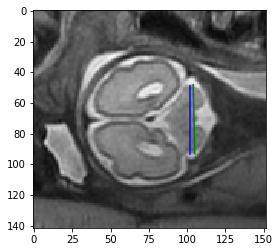

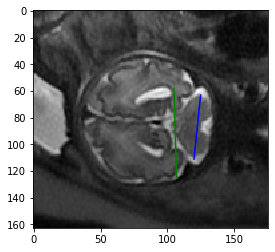

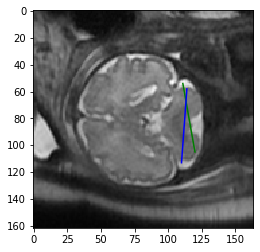

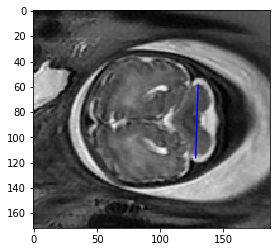

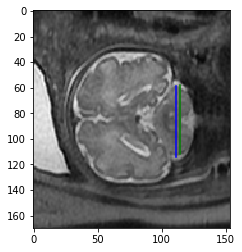

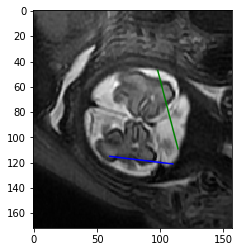

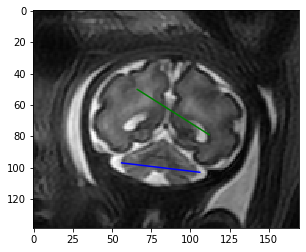

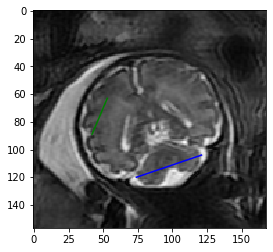

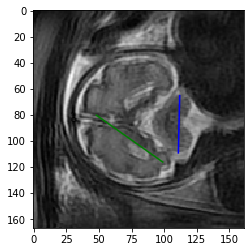

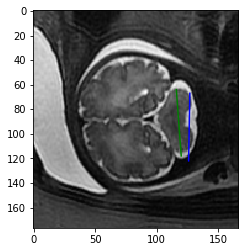

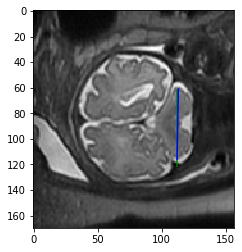

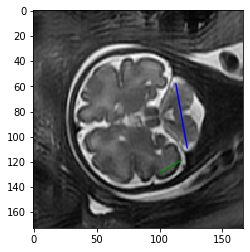

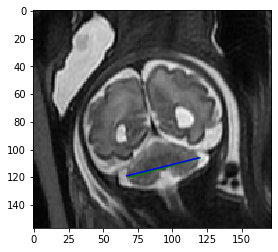

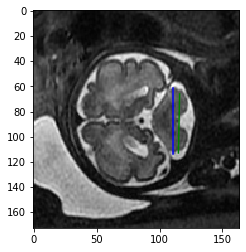

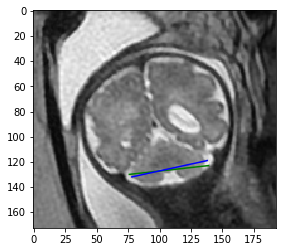

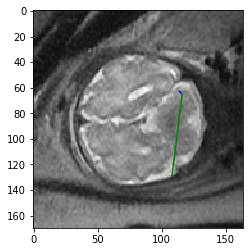

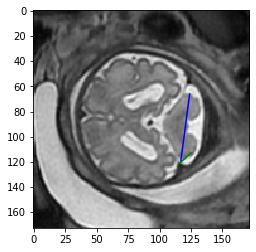

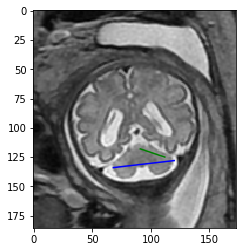

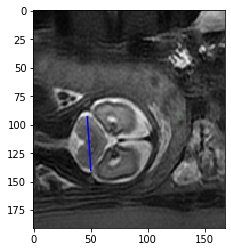

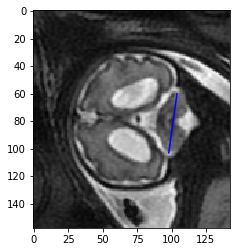

<Figure size 432x288 with 0 Axes>

In [13]:
for i in range(len(df_for_hrnet)):
    img = cv2.imread(os.path.join(OUTPUT_PNG_DIR, df_for_hrnet.loc[i, "image_name"]))
    plt.imshow(img)
    plt.plot(predictions[i].cpu().numpy()[:,1], predictions[i].cpu().numpy()[:,0] , 'g-')
    
    x1_point = int(df_for_hrnet.loc[i,'tcd_1_x'])
    y1_point = int(df_for_hrnet.loc[i,'tcd_1_y'] )
    x2_point = int(df_for_hrnet.loc[i,'tcd_2_x'])
    y2_point = int(df_for_hrnet.loc[i,'tcd_2_y'] )
    
    plt.plot((y1_point,y2_point), (x1_point, x2_point), 'b-')
    plt.figure()